# Lab 2: Rheology

## Introduction

When you jump into a swimming pool, it's a completely different experience from putting your fist through a window. This has to do with the differences in <i><b>rheology</b></i> between glass and water. <i><b>Rheology describes the way in which a material deforms in response to stress.</b></i> Glass responds to your fist by shattering in a brittle fashion, while water flows around you when you jump into the pool. In this lab we will explore different types of deformation, and will apply our new knowledge of deformation to some geologic and fluid problems.

## Learning goals

By the end of this lab, students should be able to:
1. Describe the physical relationship between stress and strain in elastic materials
2. Build off of knowledge of elastic materials gained in this lab to discuss how plastic and viscous materials behave in comparison
3. Make basic plots using matplotlib
4. Contextualize the three modes of deformation in terms of geologic processes

## Background

### Stress and strain

As suggested in the introduction, different substances respond to stress in different ways. <i><b>Stress</b></i>, denoted by $\sigma$, is a force per unit area exerted on an object. <b><i>Strain</i></b>, $\epsilon$, is the objects's response to stress. Strain is expressed as a unitless number describing the change that an object has undergone (e.g., lateral stretching, shearing, etc.). 

In physics-speak, "normal" means "perpendicular to a surface." Therefore, we call a strain that results from stress applied perpendicular to a surface the <b><i>normal strain</i></b> ($\epsilon_N$). Normal strain may be computed by dividing the change in length by the original length. It is generally expressed as a percentage, hence why we multiply by 100 below.

### $\epsilon_N = \frac{\Delta L}{L} * 100$

Objects responding to stress can also exhibit <b><i>shear strain ($\gamma$)</i></b>, which is written as

### $\gamma = \tan \beta$

Unlike normal strain, which results from stress applied perpendicular to a surface, shear strain results from stress applied parallel to a surface. This type of strain is calculated from the tangent of the angle between the original and deformed sides. Both are shown below (from Sharir et al., 2008). 

<div>
<img src="images/normal_vs_shear.png" align="center" width="500"/>
</div>

## Rheologies (styles of deformation)

Normal and shear strain broadly describe deformation as a response to applied stresses; however, these terms tell us more about the stress that was applied than about the characteristic behavior of the material undergoing deformation. To understand material behavior, we recognize three modes of deformation: elastic, brittle/plastic, and viscous. 

### Elastic 

Elastic materials, such as springs, rubber bands, and moon shoes, strain in proportion to the stress applied. In the case of deformation of a spring, we write Hooke's Law. This law states that the force (which is related to stress by unit area) required to displace an object some distance is equal to the length of displacement times a constant

$F = kx$ 

where $x$ is the change in length of the object undergoing deformation and $k$ is the <b><i>spring constant</i></b>. Can you work out the units of $k$? Now think carefully about what this equation tells us about material behavior. We can see that if the force applied is 0, displacement must also be 0. This is the defining characteristic of elastic objects: they regain their original shape when the force applied is removed. This lab will focus on elastic deformation. 

Hooke's Law can be written in a more general form as

$\sigma = E\epsilon$

where $E$ is a factor called Young's modulus.

### Plastic deformation

Many materials fall into the plastic rheology class. These materials can withstand a finite amount of stress for which they will experience minimal strain. However, when stress exceeds the material's strength, they will begin to deform permanently (and often rapidly). If the deformation is discontinuous (meaning the material physically shatters), such as the crust fracturing in a geologic fault zone, we say it is <i>brittle-plastic</i> deformation. If deformation is continuous, but still permanent and bound by a stress threshold, we say it is plastic. Can you think of a geologic example of this?

The schematic below (from degreetutors.com) illustrates stress-strain relationships in plastic materials.

<img src = 'images/stress_strain.png' align = 'center' width = '600'> 

### Linear viscous deformation

Linear viscous materials (linear viscous fluids) undergo continuous and permanent deformation. This means that unlike plastic materials, there is no strength threshold that needs to be exceeded for deformation to occur. And unlike elastic materials, linear viscous fluids do not "bounce back" from an applied stress.

Think about the example of jumping into a pool of water. The fact that the water reshapes to a flat surface after you jump into the pool does not mean that the deformation has been undone, just that the process of deformation involved water moving until its new surface was flat. If we could see the individual water molecules, we would see that the structure of the fluid is irreversibly changed every time it deforms. 

We will discuss viscous rheologies more in the next lab. For now, you should know that linear viscous fluids exhibit a linear relationship between stress and strain rate, multiplied by the fluid's dynamic viscosity. For reasons that will become clear in the following lab, we typically expresses linear viscous deformation in terms of the <i>shear</i> component of stress and the shear strain <i>rate</i>:

$\tau = \mu \frac{d\gamma}{dt}$

where $\tau$ is shear stress, $\mu$ is dynamic viscosity, and $\gamma$ is shear strain.

As we think explore rheology throughout today's lab, ask yourself: 
- Why are elastic and plastic rheologies expressed in terms of strain, and linear viscous rheology is in terms of strain rate?
- Why do we only care about the shear component in linear viscous deformation? 
- Does this makes sense to you? Why or why not?

## An example

Let's say you collected the following data in a lab setting where you measured the displacement of a spring for each time different weights (here we use pennies) were suspended from it. You want to analyze this data to determine a relationship between stress and strain for this material. You have the following data:

In [1]:
# we'll be doing some basic math and plotting, so we need to import a couple of libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# masses and weights

g = 9.81 # gravitational accleration, m/s^2
mass_of_penny = 2.50 # grams
weight_of_penny = g*mass_of_penny

# a quick way to put all of the weights you tested into an array is to use np.arange
# we started without any pennies suspended from our spring, so our range will start at 0
# the greatest number of pennies that we tested was 20. Since np.arange goes up to but does not include our "stop" value, 
# we will set the "stop" value to be 1 higher than 20, like this:
penny_array = np.arange(0, 21, 5)

# now we want to convert the number of pennies tested in each trial into a weight
# we can do this by performing an operation on the penny_array, and saving that result to a new array
weight_array = penny_array * weight_of_penny

# let's perform another operation to make sure the weights are in kg m/s^2 (currently they are g m/s^2)
# we can do this by dividing by 1000
weight_array_kg = weight_array/1000

# print all arrays to make sure you understand what's happened:
print(penny_array)
print(weight_array)
print(weight_array_kg)

[ 0  5 10 15 20]
[  0.    122.625 245.25  367.875 490.5  ]
[0.       0.122625 0.24525  0.367875 0.4905  ]


In [10]:
# now we'll create an array to store the displacement measurements
# we don't want to use np.arange for this, because we don't know if all of our measurements were equally spaced.
# instead, we'll just enter the values by hand
# this time, instead of starting at 0, we'll start at 4, because the original length of our spring was four inches
length_array_inches = np.array([4, 4.125, 4.25, 4.375, 4.5])

# however, what we're really interested in is displacement, not length.
# to get displacement, we'll subtract the initial length from the entire array
displacement_array_inches = length_array_inches - 4

# we want units in meters, so we'll perform another array operation
displacement_array_m = displacement_array_inches/39.4 # there are 39.4 inches in a meter

In [11]:
# when we plot our data, we'll want to make sure that our x and y data are of the same length and type
# check them out now before plotting

print('weight array kg type: ', type(weight_array_kg))
print('weight array kg length: ', len(weight_array_kg))
print('displacement array m type: ', type(displacement_array_m))
print('displacement array m length: ', len(displacement_array_m))

weight array kg type:  <class 'numpy.ndarray'>
weight array kg length:  5
displacement array m type:  <class 'numpy.ndarray'>
displacement array m length:  5


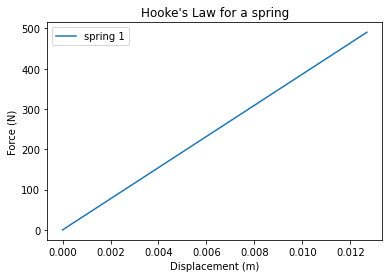

In [14]:
# time to plot! 
# we want our displacement on the x-axis, and weight (force) on the y-axis

plt.plot(displacement_array_m, weight_array, label = 'spring 1') # make the plot. The solid blue line is a deafult setting that can be changed
plt.title('Hooke\'s Law for a spring')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend()
plt.show()

# you can play with this plot by "commenting out" lines of code to figure out exactly what each line does
# to "comment out," simply place a # at the start of the line of code. This makes it inactive.

And that's all there is to it! You can embellish this plot with a legend, a larger font size, annotations, etc., but it has the functional basics now. We can see that the relationship between force and displacement is indeed linear, so we could have used `np.arange` to format the displacement measurements rather than entering them by hand. However, entering them by hand allowed us to prove this relationship to ourselves.

## Questions

1. In the background section of this lab, we state Hooke's Law for spring deformation:

    $F = xk$

    We then state a "more general" equation with a parameter $E$, the Young's modulus: 

    $ \sigma = E\epsilon$

    We say that these are equivalent; how can we get from one equation to the other?

2. In one or two sentences, please explain the relationship between stress and strain in elastic materials. What is the characteristic behavior of these materials?

3. Imagine you tested the same set of weights on a different spring, and the amount of extension was triple for each weight. Please manipulate the already created `displacement_array_m` to reflect this change. Then, please make a plot with both lines appearing on the same graph (HINT: a lot of coding is searching the internet for an example where someone else has already tackled a similar problem. In this case, a quick Google of "how to put two lines on one graph matplotlib" will help if you're stuck). You're plot should include axis labels, titles, etc, just like the example. Finally, summarize the plot in one or two sentences, relating the lines that you've graphed to Hooke's Law. What does this tell you about the materials?

4. Please think of one example involving a geologic/earth material for the following types of deformation:
    - plastic
    - brittle-plastic

## Solutions

1. We can transition between Hooke's Law and the Young's modulus equation by recalling that stress is a force per unit area. Therefore, we need only divide Hooke's Law by a unit area in order to be working in terms of stress, as in the Young's modulus equation. 

2. Stress and strain are linearly proportional in elastic materials. This means that for every incremental increase in stress, strain increases the same amount. The characteristic behavior of these materials is that when a stress (or force) ceases to be applied, the object regains its original, undeformed shape.

3. The steps for this problem are:
    - multiply the displacement array by 3
    - plot the new displacements on a plot that also contains the original displacements
    - say a few words about what the graph shows

In [17]:
# multiply the original displacement array by 3
displacement_array_m_3x = displacement_array_m * 3
print(displacement_array_m_3x)

[0.         0.00951777 0.01903553 0.0285533  0.03807107]


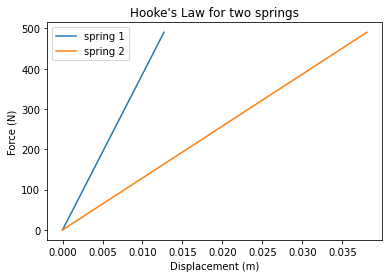

In [18]:
# plot both sets of experiments on the same plot, this time including legends
plt.plot(displacement_array_m, weight_array, label = 'spring 1')
plt.plot(displacement_array_m_3x, weight_array, label = 'spring 2')
plt.title('Hooke\'s Law for two springs')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend()
plt.show()

The slope of these lines is equal to the spring constant, $k$, from Hooke's Law. This shows us that spring 1 has a higher spring constant. This means that it requires more force on spring 1 to produce the same amount of displacement as on spring 2. We could say that spring 1 is more "rigid" than spring 2.

4. An example of plastic deformation is any folded rock structure, like an anticline. And example of brittle-plastic deformation is any fractured rock, like across a fault.